In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Read the excel file into a pandas dataframe
df = pd.read_csv('data_filtering.csv')

print(df.columns)



Index(['Time (s)', 'Linear Acceleration x (m/s^2)',
       'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)',
       'Absolute acceleration (m/s^2)'],
      dtype='object')


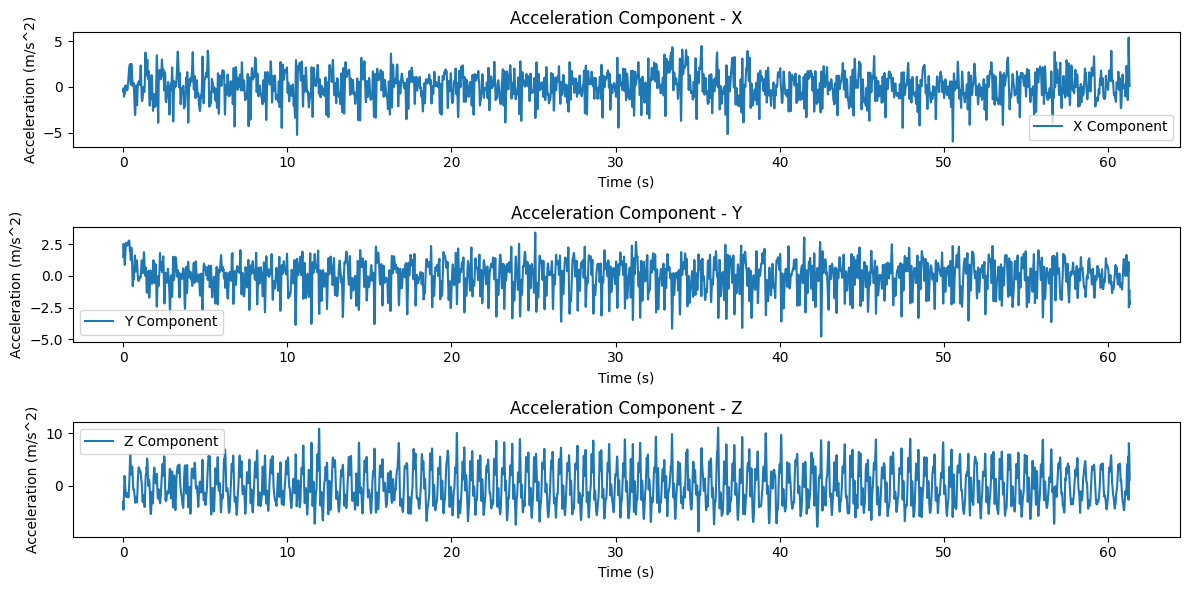

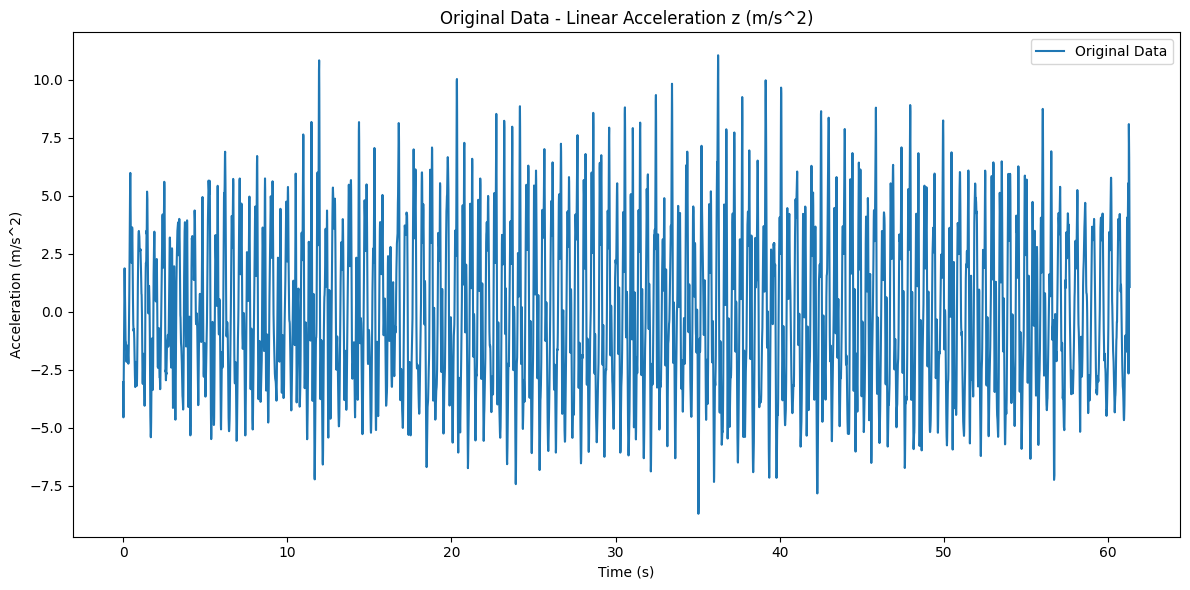

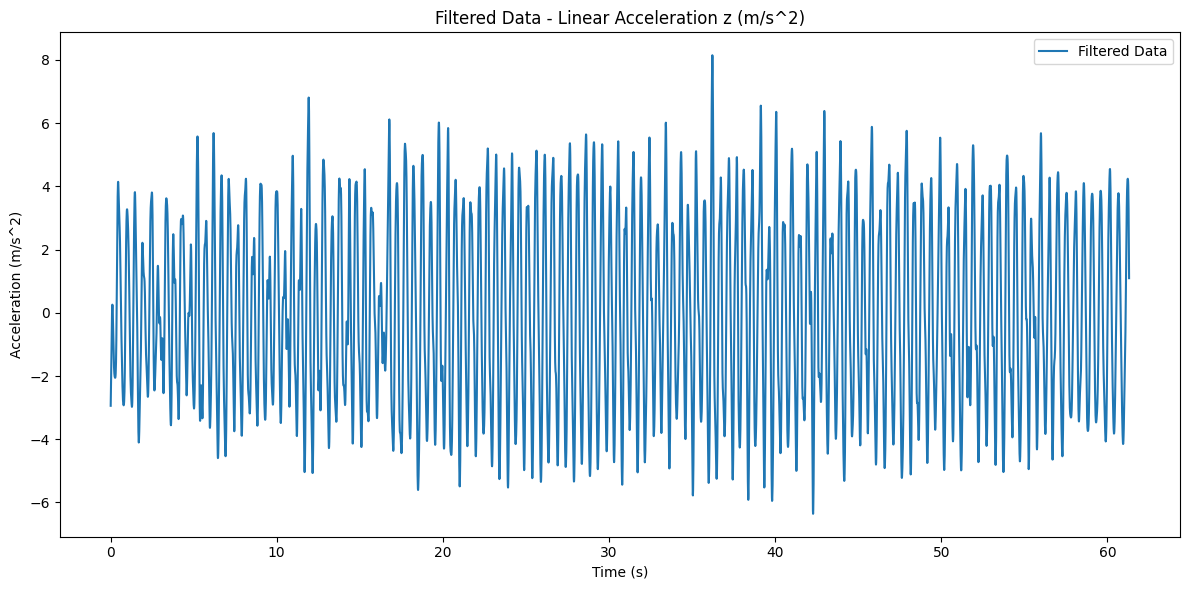

Number of steps (Calculated by the program): 126.5
Number of steps (My own count): 126
Comparison: Not Matched


In [15]:
# Plot the acceleration components separately
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(df['Time (s)'], df['Linear Acceleration x (m/s^2)'], label='X Component')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Acceleration Component - X')

plt.subplot(3, 1, 2)
plt.plot(df['Time (s)'], df['Linear Acceleration y (m/s^2)'], label='Y Component')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Acceleration Component - Y')

plt.subplot(3, 1, 3)
plt.plot(df['Time (s)'], df['Linear Acceleration z (m/s^2)'], label='Z Component')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Acceleration Component - Z')

plt.tight_layout()
plt.show()

# Component with the most oscillation
sum_x = df['Linear Acceleration x (m/s^2)'].abs().sum()
sum_y = df['Linear Acceleration y (m/s^2)'].abs().sum()
sum_z = df['Linear Acceleration z (m/s^2)'].abs().sum()

selected_component = 'Linear Acceleration x (m/s^2)' if sum_x > sum_y and sum_x > sum_z else ('Linear Acceleration y (m/s^2)' if sum_y > sum_z else 'Linear Acceleration z (m/s^2)')

# Apply a low-pass filter 
b, a = butter(2, 0.1, 'low')
selected_component_filtered = filtfilt(b, a, df[selected_component])

# Plot the filtered data 
plt.figure(figsize=(12, 6))
plt.plot(df['Time (s)'], df[selected_component], label='Original Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Original Data - ' + selected_component)
plt.tight_layout()
plt.show()

# Plot the filtered data 
plt.figure(figsize=(12, 6))
plt.plot(df['Time (s)'], selected_component_filtered, label='Filtered Data')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (m/s^2)')
plt.legend()
plt.title('Filtered Data - ' + selected_component)
plt.tight_layout()
plt.show()

#  Calculate the number of steps from the filtered data
steps = 0
for i in range(selected_component_filtered.shape[0]-1):
    if selected_component_filtered[i] / selected_component_filtered[i+1] < 0:
        steps += 0.5
print("Number of steps (Calculated by the program):", steps)

# Compare the number of steps with my own count
your_steps = 126  # Replace this with your own calculation of steps
print("Number of steps (My own count):", your_steps)
print("Comparison:", "Matched" if steps == your_steps else "Not Matched")
